In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

In [37]:
file_name1 = dir_origen_csv + "medidores_casi_uniformes2.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime

In [38]:
df['dayNumber'] = df['fecha'].dt.dayofweek
df

,fecha,medidor,lectura_id_orig,voltajeA,voltajeB,voltajeC,corrienteA,corrienteB,corrienteC,modelo,...,CLASIFICACION,kwh_consumido,kvarh_consumido,tipo_consumo,clasificacion_encoded,modelo_encoded,tipo_consumo_encoded,kwh_hora,dayMonth,dayNumber
0,2019-04-04 06:28:44,15029835,1142597,131.1979,127.9215,131.9837,0.0263,0.0017,0.0264,A3,...,IGLESIA,0.4500,0.0000,bajo,7,0,0,0.225000,14,3
1,2019-04-04 08:28:44,15029835,1143023,128.4270,127.4788,129.9663,0.0013,0.0016,0.0112,A3,...,IGLESIA,0.1830,0.0090,bajo,7,0,0,0.091500,14,3
2,2019-04-04 10:28:44,15029835,1143417,125.9862,125.7077,128.2971,0.0013,0.0016,0.0112,A3,...,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.048000,14,3
3,2019-04-04 12:28:45,15029835,1143779,126.8655,126.0735,128.6225,0.0013,0.0016,0.0114,A3,...,IGLESIA,0.0960,0.0000,bajo,7,0,0,0.047993,14,3
4,2019-04-04 14:28:45,15029835,1144165,125.2453,123.8318,127.2888,0.1740,0.0020,0.0110,A3,...,IGLESIA,0.1230,0.0000,bajo,7,0,0,0.061500,14,3
5,2019-04-04 16:28:45,15029835,1144530,125.9855,125.0129,128.1258,0.0013,0.0017,0.0112,A3,...,IGLESIA,0.2490,0.0000,bajo,7,0,0,0.124500,14,3
6,2019-04-05 06:28:47,15029835,1147537,129.0491,127.8222,130.0290,0.0266,0.0017,0.0263,A3,...,IGLESIA,0.4470,0.0000,bajo,7,0,0,0.223500,14,4
7,2019-04-05 08:28:47,15029835,1147941,127.9209,127.1520,129.3010,0.0013,0.0016,0.0113,A3,...,IGLESIA,0.1650,0.0120,bajo,7,0,0,0.082500,14,4
8,2019-04-05 10:28:48,15029835,1148346,126.8511,126.2283,128.2661,0.0013,0.0016,0.0112,A3,...,IGLESIA,0.0930,0.0000,bajo,7,0,0,0.046494,14,4
9,2019-04-05 12:55:05,15029835,1148711,125.7741,124.2303,127.2888,0.0015,0.0016,0.0111,A3,...,IGLESIA,0.0720,0.0000,bajo,7,0,0,0.029532,14,4


In [39]:
df['Lunes']= df.loc[df['dayNumber']==0 ,:]['kwh_consumido'] 
df['Martes']= df.loc[df['dayNumber']==1 ,:]['kwh_consumido'] 
df['Miercoles']= df.loc[df['dayNumber']==2 ,:]['kwh_consumido']
df['Jueves']= df.loc[df['dayNumber']==3 ,:]['kwh_consumido'] 
df['Viernes']= df.loc[df['dayNumber']==4 ,:]['kwh_consumido'] 
df['Sabado']= df.loc[df['dayNumber']==5 ,:]['kwh_consumido'] 
df['Domingo']= df.loc[df['dayNumber']==6 ,:]['kwh_consumido'] 
df[['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']]

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
0,NaN,NaN,NaN,0.4500,NaN,NaN,NaN
1,NaN,NaN,NaN,0.1830,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0960,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0960,NaN,NaN,NaN
4,NaN,NaN,NaN,0.1230,NaN,NaN,NaN
5,NaN,NaN,NaN,0.2490,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.4470,NaN,NaN
7,NaN,NaN,NaN,NaN,0.1650,NaN,NaN
8,NaN,NaN,NaN,NaN,0.0930,NaN,NaN
9,NaN,NaN,NaN,NaN,0.0720,NaN,NaN


In [40]:
df_medidor_dias = df[['medidor','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']].groupby('medidor').mean()
df_medidor_dias

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
medidor,,,,,,,
15029835,0.614431,3.117750,2.214294,1.178842,0.569089,3.423828,9.062625
15029844,4.799345,4.751143,4.974500,7.119600,7.892000,8.134269,9.922302
15029846,334.051594,336.163275,330.495429,343.716259,332.853341,347.193606,332.417986
15029847,31.914346,35.619702,32.394500,35.756353,25.735811,12.024367,12.594720
15029977,32.628885,30.278464,31.367135,32.917086,29.362983,30.866782,26.156650
15842885,10.388405,10.753176,8.582652,10.439022,7.291315,4.535832,1.459522
15842894,20.674896,17.578776,16.949912,19.223463,17.575968,25.193438,3.309911
16567743,7.383396,7.582437,7.631933,8.208962,7.691833,17.199113,9.445740
16567746,11.472792,12.274933,13.362326,13.495222,11.599585,12.163560,12.791878


### Clusters

k: 1  cost: 6126813.532661146
k: 2  cost: 1907026.8159999284
k: 3  cost: 605466.014374586
k: 4  cost: 353202.6479333999
k: 5  cost: 232287.3039869042
k: 6  cost: 161010.64792712178
k: 7  cost: 121034.8385493471
k: 8  cost: 84851.16458316048
k: 9  cost: 62291.37316908988


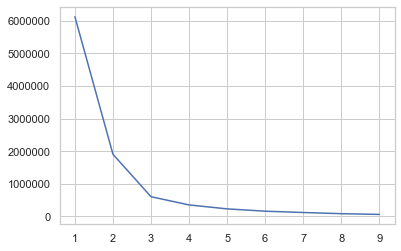

In [41]:
from sklearn.cluster import KMeans
 
A=df_medidor_dias
x=[]
y=[]
 
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    x.append(k)
    y.append(interia)
    print ("k:",k, " cost:", interia)
plt.plot(x,y)

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'random')
X=df_medidor_dias.iloc[:,0:7].values
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [43]:
df_medidor_dias.iloc[:,0:7].values

array([[6.14431034e-01, 3.11775000e+00, 2.21429412e+00, 1.17884211e+00,
        5.69089286e-01, 3.42382759e+00, 9.06262500e+00],
       [4.79934545e+00, 4.75114286e+00, 4.97450000e+00, 7.11960000e+00,
        7.89200000e+00, 8.13426923e+00, 9.92230189e+00],
       [3.34051594e+02, 3.36163275e+02, 3.30495429e+02, 3.43716259e+02,
        3.32853341e+02, 3.47193606e+02, 3.32417986e+02],
       [3.19143462e+01, 3.56197021e+01, 3.23945000e+01, 3.57563529e+01,
        2.57358113e+01, 1.20243673e+01, 1.25947200e+01],
       [3.26288852e+01, 3.02784643e+01, 3.13671346e+01, 3.29170862e+01,
        2.93629831e+01, 3.08667818e+01, 2.61566500e+01],
       [1.03884055e+01, 1.07531755e+01, 8.58265200e+00, 1.04390222e+01,
        7.29131455e+00, 4.53583158e+00, 1.45952222e+00],
       [2.06748964e+01, 1.75787755e+01, 1.69499118e+01, 1.92234635e+01,
        1.75759684e+01, 2.51934382e+01, 3.30991132e+00],
       [7.38339623e+00, 7.58243750e+00, 7.63193333e+00, 8.20896226e+00,
        7.69183333e+00, 1

In [44]:
kmeans.cluster_centers_

array([[401.89125638, 480.76860916, 425.0497836 , 448.2035931 ,
        372.66253989, 300.14288241, 198.34154558],
       [ 26.37201397,  28.52801858,  28.16253926,  28.3751691 ,
         25.75916389,  24.82560388,  20.8984984 ]])

In [45]:
distance=kmeans.fit_transform(X)
distance

array([[1014.94662728,   62.886805  ],
       [1004.55031489,   52.33084479],
       [ 259.12561852,  821.8416556 ],
       [ 947.20836045,   19.65262644],
       [ 941.67766386,   12.25734238],
       [ 999.45678911,   49.06228951],
       [ 974.76212513,   27.17127508],
       [ 998.15678137,   46.29496859],
       [ 988.98840163,   36.78514707],
       [1018.75772956,   67.13694261],
       [1020.24912461,   68.656565  ],
       [1020.09731339,   68.50272097],
       [1020.39992193,   68.8069344 ],
       [1019.95315206,   68.36054569],
       [1019.72517336,   68.12385763],
       [1021.02140263,   69.44324682],
       [1018.48646438,   66.85266032],
       [1020.95341398,   69.38012044],
       [1021.03442847,   69.45647682],
       [1020.16754239,   68.57573726],
       [1020.81041333,   69.22701686],
       [1020.11058639,   68.51417112],
       [ 938.74521896,   22.8898184 ],
       [1019.45876975,   67.85016921],
       [1018.21491402,   66.60680588],
       [1019.2626989 ,   

In [48]:
labels=kmeans.labels_
labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [49]:
df_promedio_dias = df_medidor_dias
df_promedio_dias['ClustersConsumoDias'] = labels
df_promedio_dias

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029835,0.614431,3.117750,2.214294,1.178842,0.569089,3.423828,9.062625,1
15029844,4.799345,4.751143,4.974500,7.119600,7.892000,8.134269,9.922302,1
15029846,334.051594,336.163275,330.495429,343.716259,332.853341,347.193606,332.417986,0
15029847,31.914346,35.619702,32.394500,35.756353,25.735811,12.024367,12.594720,1
15029977,32.628885,30.278464,31.367135,32.917086,29.362983,30.866782,26.156650,1
15842885,10.388405,10.753176,8.582652,10.439022,7.291315,4.535832,1.459522,1
15842894,20.674896,17.578776,16.949912,19.223463,17.575968,25.193438,3.309911,1
16567743,7.383396,7.582437,7.631933,8.208962,7.691833,17.199113,9.445740,1
16567746,11.472792,12.274933,13.362326,13.495222,11.599585,12.163560,12.791878,1


In [50]:
grupo0 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==0,:]
grupo0

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029846,334.051594,336.163275,330.495429,343.716259,332.853341,347.193606,332.417986,0
52073201,228.737792,426.315823,326.942790,287.225631,297.389039,278.851818,74.171763,0
52073321,282.857186,311.382109,252.115764,297.181316,208.017708,72.877758,63.312071,0
53307830,370.072916,374.524630,371.830326,397.742662,316.518950,207.239364,198.742911,0
58706725,793.736794,955.457209,843.864609,915.152097,708.533662,594.551866,323.062997,0


In [35]:
grupo1 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==1,:]
grupo1

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029835,0.614431,3.117750,2.214294,1.178842,0.569089,3.423828,9.062625,1
15029844,4.799345,4.751143,4.974500,7.119600,7.892000,8.134269,9.922302,1
15029847,31.914346,35.619702,32.394500,35.756353,25.735811,12.024367,12.594720,1
15029977,32.628885,30.278464,31.367135,32.917086,29.362983,30.866782,26.156650,1
15842885,10.388405,10.753176,8.582652,10.439022,7.291315,4.535832,1.459522,1
15842894,20.674896,17.578776,16.949912,19.223463,17.575968,25.193438,3.309911,1
16567743,7.383396,7.582437,7.631933,8.208962,7.691833,17.199113,9.445740,1
16567746,11.472792,12.274933,13.362326,13.495222,11.599585,12.163560,12.791878,1
16567760,0.932476,0.878719,0.895659,0.901111,0.873833,0.854017,0.811390,1


In [27]:
grupo2 = df_promedio_dias.loc[df_promedio_dias['ClustersConsumoDias']==2,:]
grupo2

,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo,ClustersConsumoDias
medidor,,,,,,,,
15029846,334.051594,336.163275,330.495429,343.716259,332.853341,347.193606,332.417986,2
52073201,228.737792,426.315823,326.942790,287.225631,297.389039,278.851818,74.171763,2
52073218,167.084872,166.201816,153.816104,162.108170,169.310875,192.581614,161.366989,2
52073321,282.857186,311.382109,252.115764,297.181316,208.017708,72.877758,63.312071,2
53307830,370.072916,374.524630,371.830326,397.742662,316.518950,207.239364,198.742911,2
58706740,135.170767,143.820746,181.657225,169.915120,146.578508,156.411885,100.265935,2


In [37]:
grupo0.to_csv(dir_origen_csv + "Cluster0_PromedioDias.csv", index= False)

In [38]:
grupo1.to_csv(dir_origen_csv + "Cluster1_PromedioDias.csv", index= False)

In [39]:
#grupo2.to_csv(dir_export_csv + "Cluster2_PromedioDias.csv", index= False)